# Sine-data for classification, regression and reinforcement learning

In [1]:
import numpy as np
import math
from numpy import sin, pi
from matplotlib import pyplot as plt

In //anaconda3/envs/py3gen/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In //anaconda3/envs/py3gen/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In //anaconda3/envs/py3gen/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In //anaconda3/envs/py3gen/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In //anaconda3/envs/py3gen/lib/python3.7/site-packages/m

Generate samples from a sinwave $a$ sin$(f\pi t)$ of scale $a$, frequency $f$ at intervals $t = i \delta t$ 

In [4]:
class mysin():
    def __init__(self,ampl = 1.0, freq=0.5, delta=0.1,phase=0.0):
        self.f,self.d,self.a,self.p = freq, delta, ampl, phase
        self.t = 0.0
        return
    def reset(self,t=0.0):
        self.t = 0.0
        return self.func()
    def next(self):
        val = self.func() 
        self.t += self.d
        return val
    def __call__(self,t):
        old_t = self.t
        self.t = t
        val = self.func()
        self.t = old_t
        return val
    def func(self):
        return self.a * sin(pi*(self.f*self.t+self.p))
    def series(self,n=10):
        return np.array([self(t*self.d) for t in range(n)])
    def set_phase(self,phase=0.0):
        self.p = phase

In [1]:
def sinmix(X,m):
    w = []
    for i in range(X.shape[0]):
        s = np.zeros(m)
        for j in [2*k for k in range(int(X.shape[1]/2))]:
            if (j/2)%2 == 0: s+=mysin(freq=X[i,j],phase=1.5,ampl=X[i,j+1]).series(m)
            elif (j/2)%2 == 1: s+=np.tanh(mysin(freq=X[i,j],phase=1.5,ampl=X[i,j+1]).series(m))
        w+=[s]
    return np.array(w)

In [2]:
#X = np.array([[0.5,1.0]])#,2.5,1.0]])
#plt.plot(sinmix(X,50)[0])
#plt.show()

In [10]:
s = mysin(freq=1.0,phase=0.0,ampl=0.2)
r = mysin(freq=2.5,phase=1.5,ampl=1.0)

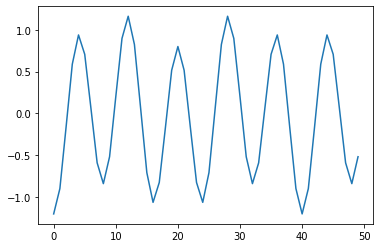

In [4]:
s.set_phase(1.5)
w = s.series(50)+r.series(50)
plt.plot(w)
plt.show()

Random class = random frequency (f) and amplitude (a); random instance of a class = random phase (p) and length (l). 
We will generate n random clusters in 2D = {f,a}. For each instance we will choose {p,l} uniformly at random to create an instance of a sine wave.